<a href="https://colab.research.google.com/github/alanramirez-86/Training-ejercicios-alan/blob/main/Copia_de_07_Advanced_SVMs_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 7 - Advanced Support Vector Machines
=====

Support vector machines let us predict catergories. In this example we will be looking at practically using SVMs by formatting data correctly, visualising the SVM model and then evaluating the SVM model.

We will be looking at __prions__ - misfolded proteins that are associated with several fatal neurodegenerative diseases (kind of like Daleks, if you have seen Doctor Who). Looking at examples of proteins mass and weight, we will build a predictive model to detect prions in blood samples.

#### Run the code below to set up the graphing features for this notebook.

In [ ]:
# Run this code!
# It sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1
-----

Lets load up the data first, and save it temporarily as rawData. Our dataset is called "PrionData.csv".

#### Replace `<addPathToData>`  with `'Data/PrionData.csv'` and then __Run the code__.

In [ ]:
import pandas as pd
import numpy as np

###
# REPLACE <addPathToData> BELOW WITH 'Data/PrionData.csv' (INCLUDING THE QUOTES) TO LOAD THE DATA FROM THAT FILE 
###
rawData = pd.read_csv("/content/drive/My Drive/data/PrionData.csv")
###

Step 2
-----

Lets take a look at the data.

#### In the cell below replace the text `<printDataHere>` with `print(rawData.head())` and then __Run the code__.

In [ ]:
###
# REPLACE <printDataHere> with print(rawData.head()) TO VIEW THE TOP 5 DATA POINTS OF THE DATA SET
###
print(rawData.head())
###

   Unnamed: 0      mass    weight prion_status
0           1  0.828588  0.015244    non-prion
1           2  0.624495  0.605444        prion
2           3  0.246620  0.691141    non-prion
3           4  0.879880  0.023820    non-prion
4           5  0.414403  0.562968    non-prion


Step 2
-----

Lets take a look at the data.

#### In the cell below replace the text `<printDataHere>` with `print(rawData.head())` and then __Run the code__.

Looks like we have an extra column, this happens regularly when exporting data sets from a program like Excel and then importing them into a dataframe.

Step 3
-----

Lets get rid of that extra column, and then check that it's gone.

#### __Run the code__ below.

In [ ]:
# Run this box to remove the extra column.
dataset = rawData.drop(['Unnamed: 0'], axis = 1)
print(dataset.head())

       mass    weight prion_status
0  0.828588  0.015244    non-prion
1  0.624495  0.605444        prion
2  0.246620  0.691141    non-prion
3  0.879880  0.023820    non-prion
4  0.414403  0.562968    non-prion


All gone!

Step 4
-----

Let's graph the data set to better understand what we're working with.

Looking at the output of the last step we can see the 'categories' we're looking at is called __prion_status__ (the label).

### In the cell below replace:
#### 1. `<addMass>` with `'mass'`
#### 2. `<addWeight>` with `'weight'`
#### then __run the code__.


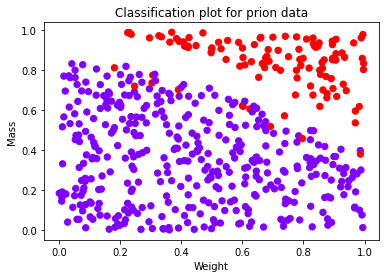

In [ ]:
###
# REPLACE THE <addMass> BELOW WITH 'mass' (INCLUDING THE QUOTES)
###
X = dataset['mass']
###

##
# REPLACE THE <addWeight> BELOW WITH 'weight' (INCLUDING THE QUOTES)
###
Y = dataset['weight']
###

# This makes a list that says which items are prions and which are not
target = dataset['prion_status'] == 'prion'

graph.scatter(X, Y, c = target, zorder = 10, s = 40)

graph.title("Classification plot for prion data")
graph.ylabel("Mass")
graph.xlabel("Weight")

graph.show()

Step 5
-------

Let's split up our data into test and training sets. We'll start by checking the total number of instances in our dataset by using the DataFrame attribute *shape*. The first number is the one we want.

#### In the cell below replace `<addShape>` with `shape` and then __Run the code__.

In [ ]:
###
# REPLACE THE <addShape> BELOW WITH THE NAME OF THE ATTRIBUTE WE WANT TO LOOK AT - shape
###
dataset.shape
###

(485, 3)

Step 6
-----

Step 5 has told us that we have nearly 500 data points. We'll use 400 examples for our training set, and the remainder for our test set.

#### Replace the `<add400>` below with `400` and run the cell.

In [ ]:
# This makes our training set out of the first 400 examples
train_X = dataset.drop(['prion_status'], 1).truncate(after = 399)
train_Y = dataset['prion_status'].truncate(after = 399)

###
# REPLACE THE <add400> BELOW WITH 400 TO MAKE THE TEST SET OUT OF THE REMAINING EXAMPLES
###
test_X = dataset.drop(['prion_status'], 1).truncate(before = 400).reset_index(drop = True)
test_Y = dataset['prion_status'].truncate(before = 400).reset_index(drop = True)
###

Step 7
-----

Well done! Lets look at a summary of our training data.

#### In the cell below replace `<addDescribe>` with `describe()` then __run the code__.

In [ ]:
###
# REPLACE THE <addDescribe> BELOW WITH 'describe()'
###
print(train_X.describe())
print(train_Y.describe())
###

             mass      weight
count  400.000000  400.000000
mean     0.489133    0.455074
std      0.287709    0.284250
min      0.001031    0.002814
25%      0.236633    0.214480
50%      0.487189    0.434874
75%      0.734339    0.678262
max      0.996911    0.989369
count           400
unique            2
top       non-prion
freq            314
Name: prion_status, dtype: object


314 non-prions out of 400, which means there's 86 prions in there. That looks about right if we refer to the graph we made in Step 4.

Let's take a look at our test set too.

#### Use the `describe()` function again, this time looking at __test__ instead of train.

In [ ]:
###
# REPLACE THE <addDescribe> BELOW WITH describe()
###
print(test_X.describe())
print(test_Y.describe())
###

            mass     weight
count  85.000000  85.000000
mean    0.482841   0.491017
std     0.286149   0.306341
min     0.011126   0.000101
25%     0.216997   0.258093
50%     0.454932   0.435351
75%     0.741668   0.778172
max     0.994465   0.978041
count            85
unique            2
top       non-prion
freq             61
Name: prion_status, dtype: object


Looks good to me! Alright, enough of that - lets make an SVM.

Step 8
-----

Below we will make an SVM, similar to the previous exercise.

Remember, the syntax for SVM's is:

`SVM_Model = svm.SVC().fit(features, labels)`

### In the cell below replace:
#### 1. `<addFeatures>` with `train_X`
#### 2. `<addLabels>` with `train_Y`
#### and then __run the code__.

In [ ]:
from sklearn import svm

###
# REPLACE <addFeatures> WITH train_X and <addLabels> WITH train_Y
###
SVM_Model = svm.SVC(gamma = 'auto').fit(train_X, train_Y)
###
print("done!")

done!


Well done! We've made a SVM Model from our training set.

Step 9
-----

Lets use our model to make some predictions. __Run the code__ in the cell below.

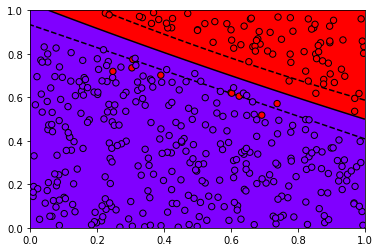

In [ ]:
# Don't edit this! Just hit run to plot the graph


#This makes a plot of our SVM
def plot_SVM(clf, data, target):
    #Make a list of which are prions
    is_prion = target == 'prion'

    graph.scatter(data['mass'], data['weight'], c = is_prion, zorder = 10, edgecolor = 'k', s = 40)
    
    # Put the result into a colour plot
    XX, YY = np.mgrid[0:1:255j, 0:1:255j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    graph.pcolormesh(XX, YY, Z > 0)
    graph.contour(XX, YY, Z, colors = ['k', 'k', 'k'], linestyles = ['--', '-', '--'], levels = [-.5, 0, .5])
    
    graph.ylim(0, 1)
    graph.xlim(0, 1)
    
    graph.show()

#Call the code to plot our SVM
plot_SVM(SVM_Model, train_X, train_Y)

Step 10
-------

The SVM has done a reasonable job of separating our test dataset into two. Now lets take a look at our test set.

Remember our syntax for plotting SVM's is: `plot_SVM(SVM_Model, features, labels)`

Add our __test__ set below to see how it looks.

### In the cell below replace:
#### 1. `<addTestX>` with `test_X`
#### 2. `<addTestY>` with `test_Y`
#### and then __run the code__.

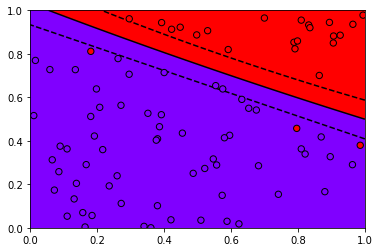

In [ ]:
###
# REPLACE <addTestX> WITH test_X AND <addTestY> WITH test_Y
###
plot_SVM(SVM_Model, test_X, test_Y)
###

Step 11
-----

Graphing is a good way to see how our model has done, but sometimes numbers can be better. Lets calculate the accuracy of our SVM in each dataset.

### In the cell below replace:
#### 1. `<addTrainX>` with `train_X`
#### 2. `<addTestX>` with `test_X`
#### 3. `<addTrainY>` with `train_Y`
#### 4. `<addTestY>` with `test_Y`
#### and then __run the code__.

In [ ]:
###
# REPLACE <addTrainX> WITH train_X AND <addTestX> with test_X FEATURE SETS TO GENERATE THE PREDICTIONS
###
train_P = SVM_Model.predict(train_X.values)
test_P = SVM_Model.predict(test_X.values)
###

# This function evaluates the SVM's accuracy
def evaluate_SVM(pred, real, name):
    matches = pred == real #see where predicted and real are the same
    accuracy = sum(matches)/len(matches)*100 #convert to percent
    print(name, "Set Accuracy:", accuracy, "%") 


###
# REPLACE <addTrainY> WITH train_Y AND <addTestY> with test_Y
###
evaluate_SVM(train_P, train_Y, 'Train')
evaluate_SVM(test_P, test_Y, 'Test')
###

Train Set Accuracy: 97.75 %
Test Set Accuracy: 96.47058823529412 %


That's a good result. 

Conclusion
------

Well done! We've taken a data set, cleaned and prepared it, made a SVM, and then evaluated it. Well done!

You can go back to the course now, or you can try using different kernels with your SVM below.

OPTIONAL: Step 12
-----

Want to have a play around with different kernels for your SVM models? It's really easy!

The standard kernel is a Radial Basis Function kernel. But there's a few more you can choose from - linear (`linear`), polynomial (`poly`), and sigmoid (`sigmoid`). Lets try them out.

If you wanted to use a linear kernel, all you need to do is add `kernel='linear'` to your model. Like this:

`SVM_Model = svm.SVC(kernel='linear')`

Give it a go with all the different kernels below. The first one is done for you

#### Run the cell below

In [ ]:
def assess_SVM(SVM_Model):
    # Plot the new linear SVM model
    plot_SVM(SVM_Model, train_X, train_Y)
    plot_SVM(SVM_Model, test_X, test_Y)

    # Use the model to predict the training and test sets.
    train_P = SVM_Model.predict(train_X.values)
    test_P = SVM_Model.predict(test_X.values)

    # Evaluate the model using the training and test sets
    evaluate_SVM(train_P, train_Y, 'Train')
    evaluate_SVM(test_P, test_Y, 'Test')

# Make a new linear SVM model
SVM_Model = svm.SVC(kernel = 'linear').fit(train_X, train_Y)

assess_SVM(SVM_Model)

You can see the hyperplane is a linear line!

Now lets try a sigmoid kernel.

#### Replace `<replaceThis>` with `'sigmoid'` then run the cell.

In [ ]:
# Make a new sigmoid SVM model

###
# REPLACE THE <replaceThis> BELOW WITH 'sigmoid' (INCLUDING THE QUOTES)
###
SVM_Model = svm.SVC(kernel = <replaceThis>, gamma = 4, coef0 = 0).fit(train_X, train_Y)
###
assess_SVM(SVM_Model)

Perhaps a sigmoid kernel isn't a good idea for this data set....

Lets try a polynomial kernel

#### Replace `<replaceWithPoly>` with `'polynomial'` then run the cell.

In [ ]:
# Make a new polynomial SVM model

###
# REPLACE THE <replaceWithPoly> BELOW WITH 'poly' (INCLUDING THE QUOTES)
###
SVM_Model = svm.SVC(kernel = <replaceWithPoly>, gamma = 10, degree = 3, coef0 = 0).fit(train_X, train_Y)
###

assess_SVM(SVM_Model)

If we were to carry on analyzing prions like this, polynomial looks like a good choice. If the data set was more complicated we could try different degrees for the polynomial to see which one was the most accurate. This is part of __`tuning`__ a model.

Well done!